# Pomožna datoteka pri analizi Lego™ setov 
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sets = pd.read_csv('obdelani-podatki/bricksets-database-1999-2019.csv',index_col='id')
pd.options.display.max_rows = 20

In [2]:
sets

,variant,ime_seta,tema,leto,tip_seta,figurice,st_kock,us_cena,eu_cena,us_ppp,eu_ppp,pakiranje,dostopnost,us_cas_izida,eu_cas_izida
id,,,,,,,,,,,,,,,
1029,1,Milk Delivery Truck,Town,1999,normal,1.0,95.0,NaN,NaN,NaN,NaN,Box,Promotional,NaN,NaN
1054,1,Stena Line Ferry,Promotional,1999,normal,NaN,212.0,NaN,NaN,NaN,NaN,Box,Promotional,NaN,NaN
1061,1,Single Disc Pack,Technic,1999,normal,NaN,NaN,NaN,NaN,NaN,NaN,Polybag,Unknown,NaN,NaN
1068,1,Air Patrol,Town,1999,normal,1.0,20.0,NaN,NaN,NaN,NaN,Box,Retail - limited,NaN,NaN
1069,1,Speedboat,Town,1999,normal,1.0,22.0,NaN,NaN,NaN,NaN,Box,Retail - limited,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISBN1080207961,1,Building LEGO BrickHeadz Heroes - Volume One: ...,Books,2019,book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISBN1081986611,1,Building LEGO BrickHeadz Villains- Volume One:...,Books,2019,book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISBN1091708533,1,Expanding the LEGO Winter Village,Books,2019,book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Povprečne velikosti setov skozi leta

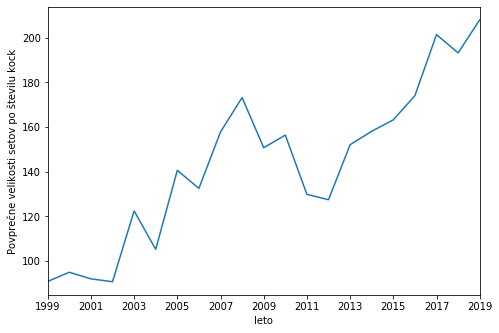

In [3]:
seti_po_letih = sets.groupby('leto')
povpr_velikost_setov = seti_po_letih.st_kock.sum() / seti_po_letih.size()

fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 1, 1])
ax1.set_ylabel('Povprečne velikosti setov po številu kock')
ax1.set_xlim((1998,2020))
povpr_velikost_setov.plot(x='leto', xticks=[i for i in range(1999,2020,2)])

In [4]:
sets[sets['st_kock'] >= 1].groupby('leto').size()

leto
1999    277
2000    280
2001    279
2002    281
2003    277
       ... 
2015    446
2016    448
2017    444
2018    426
2019    406
Length: 21, dtype: int64

Text(0, 0.5, 'Število kock')

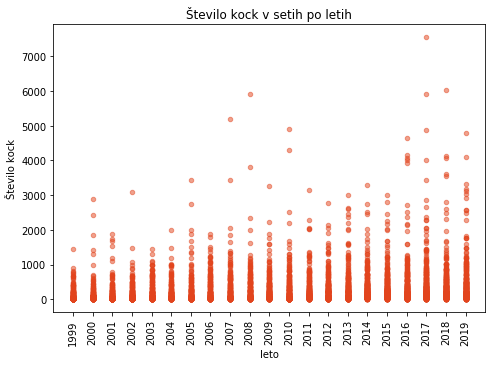

In [5]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 1, 1])
ax1.set_ylabel('Število kock')
sets.plot.scatter(x='leto', y='st_kock', ax=ax1, xticks=[i for i in range(1999,2020)], rot=90, color=['#E2441D'], alpha=0.5, title='Število kock v setih po letih',s=20)
plt.ylabel('Število kock')

## Število izdanih setov skozi leta

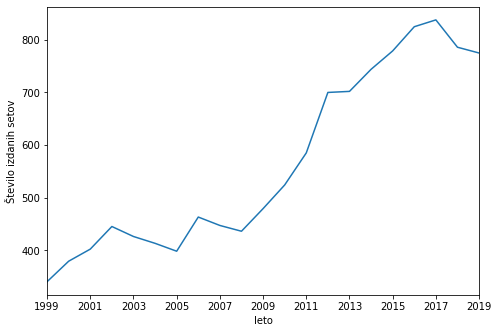

In [6]:
st_izdanih_setov = seti_po_letih.size()

fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 1, 1])
ax1.set_ylabel('Število izdanih setov')
ax1.set_xlim((1998,2020))
st_izdanih_setov.plot(x='leto', xticks=[i for i in range(1999,2020,2)])

## Najbolj priljubljene teme skozi leta



In [7]:
vse_teme_series = sets.groupby('tema').size()

keys = vse_teme_series.keys()
vse_teme = pd.DataFrame({'st_setov': [vse_teme_series[key] for key in keys]}, index=keys)
vse_teme.sort_values(by='st_setov', ascending=False).head(15)

,st_setov
tema,
Gear,2194
Star Wars,728
Duplo,716
Collectable Minifigures,614
City,614
Promotional,433
Creator,413
Bionicle,389
Friends,360


In [8]:
pd.set_option('display.max_colwidth', None)
teme = sets.groupby('tema')

df_teme = pd.DataFrame(teme[teme['leto'] == '2019'], index=keys)
df_teme
# teme.count(axis='column')
# teme[teme['tema'] == 'Znap']
# df_teme
# df_teme.groupby('leto')
# teme['leto']
# df_teme[df_teme[0] == 'Star Wars']

ValueError: Value must have type '<class 'int'>'

In [22]:
star_wars = sets[sets['tema'] == 'Star Wars']
star_wars

,variant,ime_seta,tema,leto,tip_seta,figurice,st_kock,us_cena,eu_cena,us_ppp,eu_ppp,pakiranje,dostopnost,us_cas_izida,eu_cas_izida,dvoletna_doba,triletna_doba
id,,,,,,,,,,,,,,,,,
7101,1,Lightsaber Duel,Star Wars,1999,normal,2.0,52.0,6.0,NaN,11.5,11.5,Box,Retail,NaN,NaN,1998,1999
7110,1,Landspeeder,Star Wars,1999,normal,2.0,49.0,6.0,NaN,12.2,12.2,Box,Retail,NaN,NaN,1998,1999
7111,1,Droid Fighter,Star Wars,1999,normal,NaN,62.0,6.0,NaN,9.7,9.7,Box,Retail,NaN,NaN,1998,1999
7121,1,Naboo Swamp,Star Wars,1999,normal,4.0,82.0,10.0,NaN,12.2,12.2,Box,Retail,NaN,NaN,1998,1999
7128,1,Speeder Bikes,Star Wars,1999,normal,3.0,93.0,10.0,NaN,10.8,10.8,Box,Retail,NaN,NaN,1998,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911950,1,B-Wing,Star Wars,2019,other,NaN,NaN,NaN,NaN,NaN,NaN,Foil pack,Retail - limited,NaN,NaN,2018,2017
911951,1,First Order Stormtrooper,Star Wars,2019,other,1.0,NaN,NaN,NaN,NaN,NaN,Foil pack,Retail - limited,NaN,NaN,2018,2017
911952,1,Jedi Interceptor,Star Wars,2019,other,NaN,NaN,NaN,NaN,NaN,NaN,Foil pack,Retail - limited,NaN,NaN,2018,2017


In [23]:
znap = sets[sets['tema'] == 'Znap']
znap

,variant,ime_seta,tema,leto,tip_seta,figurice,st_kock,us_cena,eu_cena,us_ppp,eu_ppp,pakiranje,dostopnost,us_cas_izida,eu_cas_izida,dvoletna_doba,triletna_doba
id,,,,,,,,,,,,,,,,,
3505,1,Aeroplane,Znap,1999,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,1999
3506,1,Motorbike,Znap,1999,normal,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,1999
3520,1,Forklift,Znap,1999,normal,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,1999
3521,1,Racer,Znap,1999,normal,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,1999
3533,1,{unknown},Znap,1999,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,1999
3554,1,Helicopter,Znap,1999,normal,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,1999
3555,1,Jeep,Znap,1999,normal,NaN,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,1999
3582,1,Super Constructor Set,Znap,1999,normal,NaN,258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,1999


In [24]:
star_wars.groupby('leto').size()
df_sw = pd.DataFrame(star_wars.groupby('leto').size()).rename(columns={0: 'Star Wars'})
df_sw

,Star Wars
leto,
1999,13
2000,19
2001,10
2002,25
2003,20
...,...
2015,64
2016,66
2017,66


In [25]:
znap.groupby('leto').size()
df_z = pd.DataFrame(znap.groupby('leto').size()).rename(columns={0: 'Znap'})
df_z

,Znap
leto,
1999,8


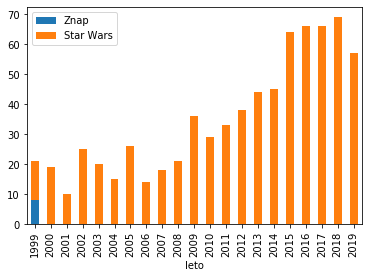

In [26]:
merg = pd.concat([df_z, df_sw], axis=1)
merg.plot.bar(stacked=True)

In [27]:
merg

,Znap,Star Wars
leto,,
1999,8.0,13
2000,NaN,19
2001,NaN,10
2002,NaN,25
2003,NaN,20
...,...,...
2015,NaN,64
2016,NaN,66
2017,NaN,66


Izbranih top 12 tem-kategorij lego setov

In [28]:
most_pop = ['Star Wars', 'Duplo', 'Collectable Minifigures', 'City', 'Creator', 'Bionicle', 'Friends', 'Ninjago', 'Books', 'Technic', 'Racers', 'Education']
df_pop_tem = [pd.DataFrame(sets[sets['tema'] == tema].groupby('leto').size()).rename(columns={0: tema}) for tema in most_pop]
letne_teme = pd.concat(df_pop_tem, axis=1)


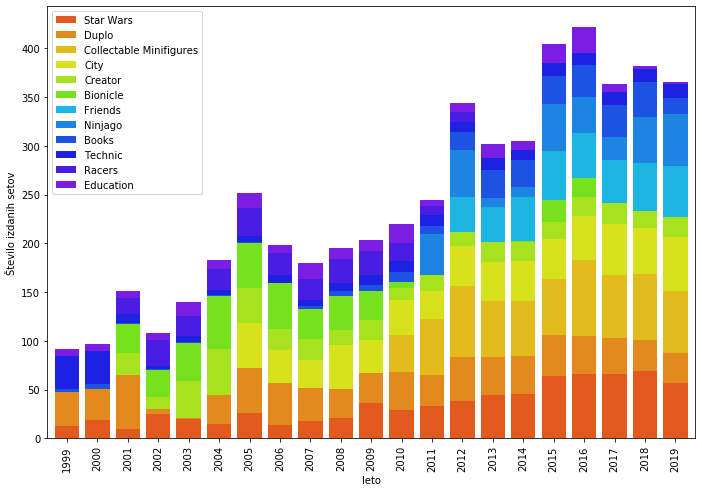

In [29]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 1.5, 1.5])
ax1.set_ylabel('Število izdanih setov')
colors = ['#E2591D', '#E28A1D', '#E2BC1D', '#D7E21D', '#A6E21D', '#75E21D', '#1DB5E2', '#1D84E2', '#1D53E2', '#1D21E2', '#4A1DE2', '#7B1DE2']
letne_teme.plot(kind='bar', ax=ax1, stacked=True, width=0.8, color=colors)


## Raznolikost velikosti setov skozi dvoletna obdobja

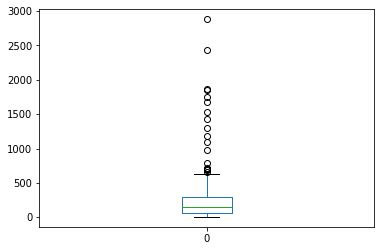

In [30]:
sets['dvoletna_doba'] = (sets.leto // 2) * 2
dvat = sets[sets['dvoletna_doba'] == 2000].groupby('st_kock')
dvat_df = pd.DataFrame(dvat)
dvat_df.plot.box()

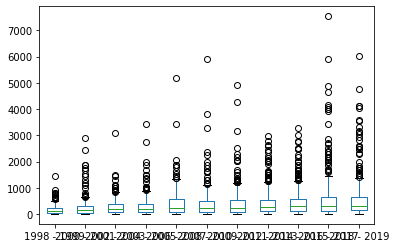

In [31]:
df_dva_let = [pd.DataFrame(sets[sets['dvoletna_doba'] == obdobje].groupby('st_kock')).rename(columns={0: f'{obdobje} - {obdobje + 1}'}) for obdobje in range(1998,2020,2)]
obdobja = pd.concat(df_dva_let, axis=1)
obdobja.plot.box()

## Raznolikost velkosti Lego setov skozi triletna obdobja 

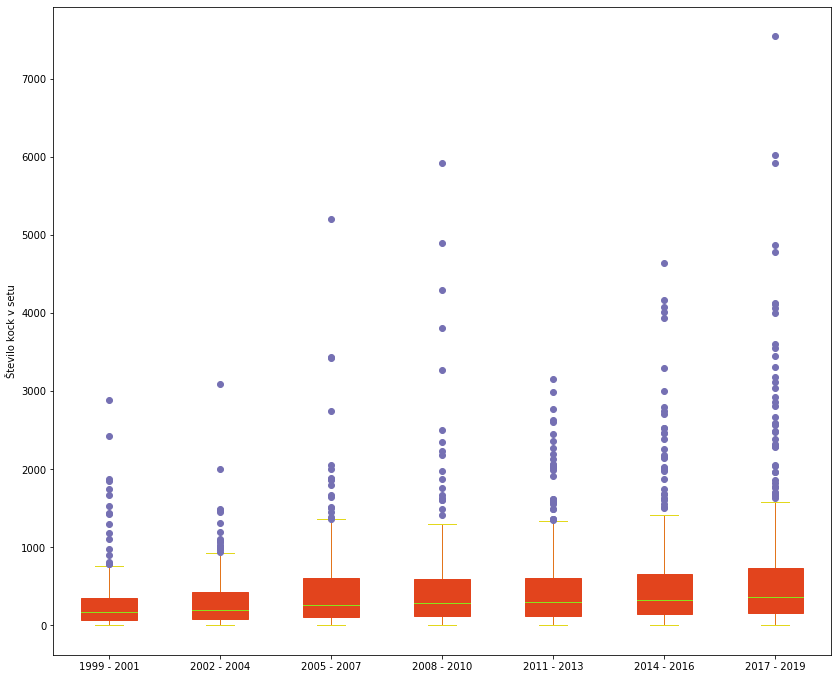

In [32]:
sets['triletna_doba'] = ((sets.leto - 1) // 3) * 3 + 1
df_tri_let = [pd.DataFrame(sets[sets['triletna_doba'] == obdobje].groupby('st_kock')).rename(columns={0: f'{obdobje} - {obdobje + 2}'}) for obdobje in range(1999,2020,3)]
tri_let_dobe = pd.concat(df_tri_let, axis=1)

fig = plt.figure(1, figsize=(9,6))
ax1 = fig.add_subplot(111, position=[0, 0, 1.2, 1.5])
ax1.set_ylabel('Število kock v setu')
colors = {'boxes': '#E2441D', 'whiskers': '#E2751D','medians': '#8AE21D','caps': '#E2D81D' }

tri_plot = tri_let_dobe.plot(kind='box', ax=ax1, showfliers=True, patch_artist=True, color=colors, sym='#7570b3')


[Text(0, 0, '1999 - 2001'),
 Text(0, 0, '2002 - 2004'),
 Text(0, 0, '2005 - 2007'),
 Text(0, 0, '2008 - 2010'),
 Text(0, 0, '2011 - 2013'),
 Text(0, 0, '2014 - 2016'),
 Text(0, 0, '2017 - 2019')]

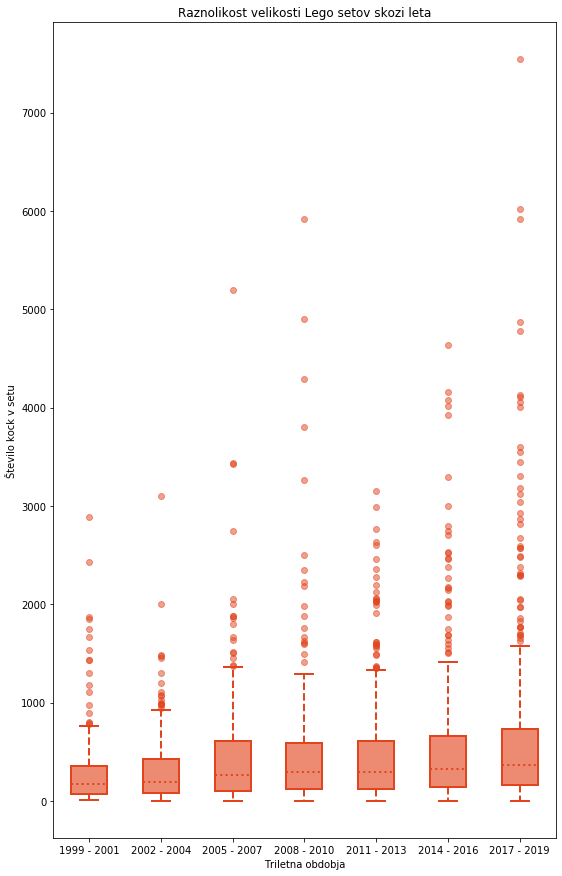

In [33]:
df_tri_let = [pd.DataFrame(sets[sets['triletna_doba'] == obdobje].groupby('st_kock'))[0] for obdobje in range(1999,2020,3)]

fig = plt.figure(1, figsize=(9,15))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Število kock v setu')
ax1.set_xlabel('Triletna obdobja')
ax1.set_title('Raznolikost velikosti Lego setov skozi leta')
bp = ax1.boxplot(df_tri_let, patch_artist=True, sym='#E2441D')

for box in bp['boxes']:
    box.set(color='#E2441D', linewidth=2)
    box.set(facecolor = '#ED8A72', alpha=1)

for whisker in bp['whiskers']:
    whisker.set(color='#E2441D', linewidth=2, linestyle='dashed')

for cap in bp['caps']:
    cap.set(color='#E2441D', linewidth=2)

for median in bp['medians']:
    median.set(color='#E2441D', linestyle=':', linewidth=2, marker='', markersize=7)

for flier in bp['fliers']:
    flier.set(marker='o', alpha=0.5)

ax1.set_xticklabels([f'{i} - {i + 2}' for i in range(1999,2020,3)])

## Scatter za ppp

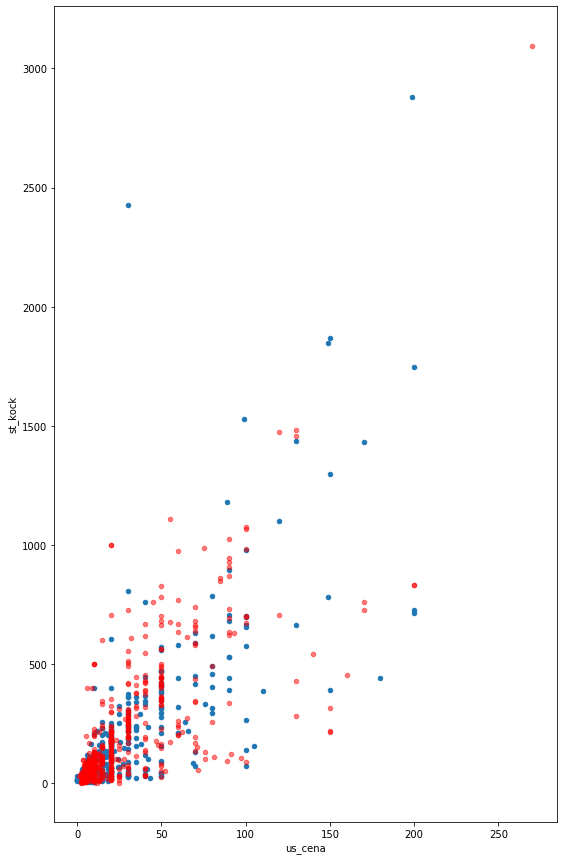

In [34]:
a = sets[sets.triletna_doba == 1999]
b = sets[sets.triletna_doba == 2002]

fig = plt.figure(1, figsize=(9,15))
ax1 = fig.add_subplot(111)

a.plot.scatter(x='us_cena', y='st_kock', ax=ax1)
b.plot.scatter(x='us_cena', y='st_kock', ax=ax1, color='r', alpha=0.5)


## Minifigs


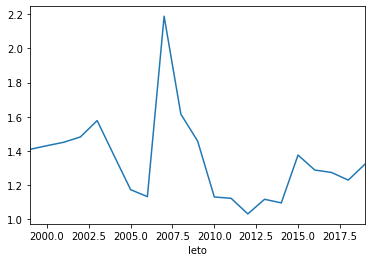

In [97]:
# meje = [0,5,10,15,25,40,60,80,100,150,200,300,500,1000]
meje = [0,10,15,25,50,100,150,300]
a = sets[(sets.us_cena > 0) & (sets.us_cena <= 10) & (sets.figurice > 0)].groupby('leto').figurice.mean().plot()
a

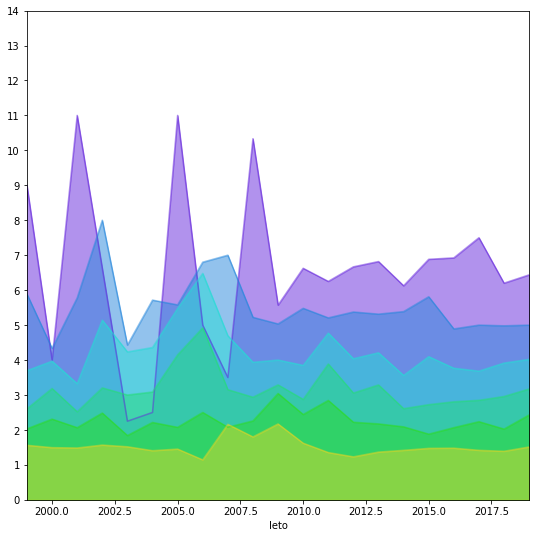

In [108]:
fig = plt.figure(1, figsize=(9,9))
ax1 = fig.add_subplot(111)
colors = ['#DCD626', '#2CDC26', '#26DC7B', '#26DCD6', '#2687DC', '#6526DC']
for i in [5,4,3,2,1,0]:
    sets[(sets.us_cena > meje[i]) & (sets.us_cena <= meje[i + 2]) & (sets.figurice > 0)].groupby('leto').figurice.mean().plot(ax=ax1, kind='area', stacked=False, yticks=[j for j in range(15)], color=colors[i])

In [109]:
5, 7
4, 6
3, 5
2, 4
1, 3
0, 2


(0, 2)

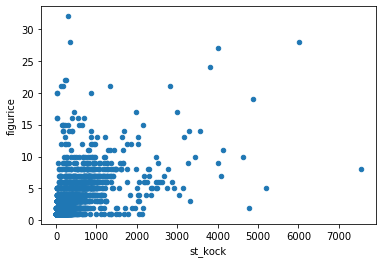

In [110]:
sets.plot.scatter(x='st_kock', y='figurice')

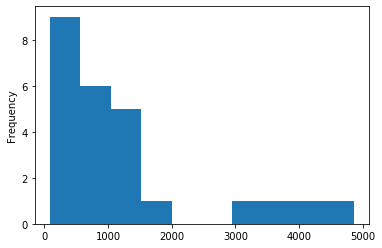

In [114]:
sets.groupby('figurice').st_kock.mean().plot.hist()

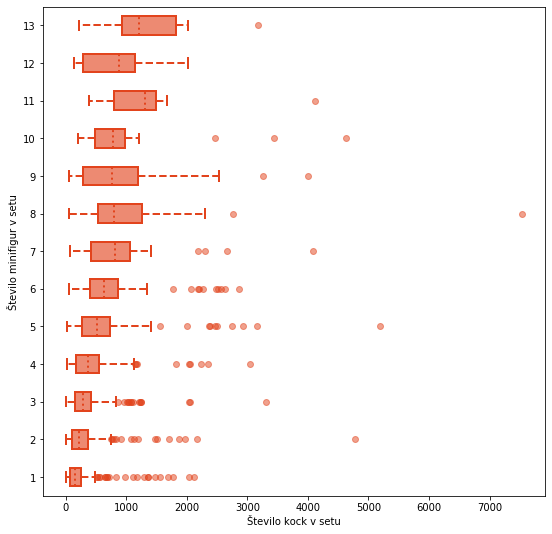

In [118]:
df_figurice = [pd.DataFrame(sets[sets['figurice'] == k].groupby('st_kock'))[0] for k in range(1,14)]

fig2b = plt.figure(1, figsize=(9,9))
ax2b = fig2b.add_subplot(111)
ax2b.set_ylabel('Število minifigur v setu')
ax2b.set_xlabel('Število kock v setu')
# ax2b.set_title()
bp2 = ax2b.boxplot(df_figurice, patch_artist=True, sym='#E2441D', vert=False)

for box in bp2['boxes']:
    box.set(color='#E2441D', linewidth=2)
    box.set(facecolor = '#ED8A72', alpha=1)

for whisker in bp2['whiskers']:
    whisker.set(color='#E2441D', linewidth=2, linestyle='dashed')

for cap in bp2['caps']:
    cap.set(color='#E2441D', linewidth=2)

for median in bp2['medians']:
    median.set(color='#E2441D', linestyle=':', linewidth=2, marker='', markersize=7)

for flier in bp2['fliers']:
    flier.set(marker='o', alpha=0.5)

# ax2b.set_xticklabels([f'{i} - {i + 2}' for i in range(1999,2020,3)])